# Custom Models and Training with TensorFlow

In [1]:
import tensorflow as tf

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
tf.config.experimental.list_physical_devices(device_type='GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Using Tensorflow like NumPy

In [4]:
t = tf.constant([1,2,3,4,5,6], shape=(2,3), dtype = 'float32')

In [5]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [6]:
t.shape

TensorShape([2, 3])

In [7]:
t[1]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([4., 5., 6.], dtype=float32)>

In [8]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [9]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [10]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

tf.square(t)

In [11]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [12]:
tf.exp(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[  2.7182817,   7.389056 ,  20.085537 ],
       [ 54.59815  , 148.41316  , 403.4288   ]], dtype=float32)>

Some functions have a different name than in NumPy; for instance, tf.reduce_mean(), tf.reduce_sum(), tf.reduce_max(), and tf.math.log() are the equivalent of np.mean(), np.sum(), np.max() and np.log(). 

### Using Keras.backend

In [13]:
from tensorflow import keras

In [14]:
K = keras.backend

In [15]:
K.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

## Tensors and NumPy

In [16]:
import numpy as np
a = np.array([2,4,6], dtype = np.float32)

In [17]:
a.dtype

dtype('float32')

In [18]:
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 4., 6.], dtype=float32)>

In [19]:
type(t.numpy())

numpy.ndarray

In [20]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 4., 16., 36.], dtype=float32)>

In [21]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

## Type Conversions

Type conversions can significantly hurt performance, and they can easily go unnoticed when they are done automatically. To avoid this, TensorFlow does not perform any type conversions automatically: it just raises an exception if you try to execute an operation on tensors with incompatible types.

In [22]:
tf.constant(2.) + tf.constant(40)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]

In [23]:
tf.constant(2.) + tf.constant(2., dtype=tf.float64)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]

In [24]:
tf.constant(2.) + tf.constant(2.)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

### Casting

In [25]:
t2 = tf.constant(400, dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=402.0>

## Variables

In [26]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [27]:
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [28]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [29]:
v[:,2].assign([5, 5])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  5.],
       [ 8., 10.,  5.]], dtype=float32)>

In [30]:
v.scatter_nd_update(indices=[[0,0],[1,2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   5.],
       [  8.,  10., 200.]], dtype=float32)>

## Customizing Models and Training Algorithms

### Custom Loss Functions

In [31]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - .5
    return tf.where(is_small_error, squared_loss, linear_loss)

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [33]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=259)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=259)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

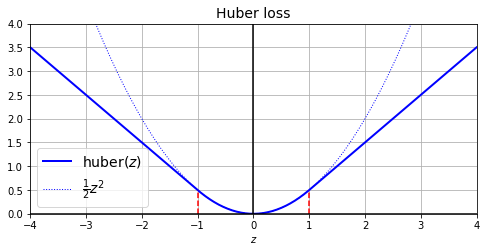

In [35]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}  z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [36]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [37]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [38]:
model.fit(X_train_scaled, y_train, epochs=30,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5791 - mae: 0.9354 - val_loss: 0.2444 - val_mae: 0.5480
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2161 - mae: 0.5106 - val_loss: 0.2321 - val_mae: 0.5292
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2075 - mae: 0.4975 - val_loss: 0.2244 - val_mae: 0.5182
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2024 - mae: 0.4904 - val_loss: 0.2192 - val_mae: 0.5091
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.1980 - mae: 0.4837 - val_loss: 0.2132 - val_mae: 0.5046
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.1940 - mae: 0.4785 - val_loss: 0.2104 - val_mae: 0.5004
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.1911 - mae: 0.4746 - val_loss: 0.2066 - val_mae: 0.4937
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.

### Saving and Loading Models That Contain Custom Components

In [39]:
model.save('model_withh_custom_loss.h5')

In [40]:
model = keras.models.load_model('model_withh_custom_loss.h5', custom_objects={'huber_fn': huber_fn})

In [41]:
model.fit(X_train_scaled, y_train, epochs = 15, validation_data=(X_valid_scaled, y_valid))

Epoch 1/15
363/363 [==============================] - 1s 3ms/step - loss: 0.1680 - mean_absolute_error: 0.4376 - val_loss: 0.1825 - val_mean_absolute_error: 0.4591
Epoch 2/15
363/363 [==============================] - 1s 3ms/step - loss: 0.1672 - mean_absolute_error: 0.4363 - val_loss: 0.1818 - val_mean_absolute_error: 0.4607
Epoch 3/15
363/363 [==============================] - 1s 3ms/step - loss: 0.1669 - mean_absolute_error: 0.4363 - val_loss: 0.1831 - val_mean_absolute_error: 0.4656
Epoch 4/15
363/363 [==============================] - 1s 3ms/step - loss: 0.1664 - mean_absolute_error: 0.4354 - val_loss: 0.1823 - val_mean_absolute_error: 0.4591
Epoch 5/15
363/363 [==============================] - 1s 3ms/step - loss: 0.1664 - mean_absolute_error: 0.4351 - val_loss: 0.1793 - val_mean_absolute_error: 0.4600
Epoch 6/15
363/363 [==============================] - 1s 3ms/step - loss: 0.1657 - mean_absolute_error: 0.4336 - val_loss: 0.1803 - val_mean_absolute_error: 0.4581
Epoch 7/15
363/3

In [42]:
def create_huber(threshold = 1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [43]:
model.compile(loss=create_huber(2.0), optimizer="nadam")

In [44]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 0.1822 - val_loss: 0.2020
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.1821 - val_loss: 0.1992


In [45]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")

In [46]:
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})

In [47]:

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 0.1812 - val_loss: 0.2010
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.1828 - val_loss: 0.1988


In [48]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [49]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [50]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [51]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 0.8260 - mae: 0.9715 - val_loss: 0.2857 - val_mae: 0.5600
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2479 - mae: 0.5164 - val_loss: 0.2508 - val_mae: 0.5213


In [52]:
model.save("my_model_with_a_custom_loss_class.h5")

In [53]:
model = keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                               custom_objects={"HuberLoss": HuberLoss})

In [54]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2302 - mean_absolute_error: 0.4977 - val_loss: 0.2415 - val_mean_absolute_error: 0.5106
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2228 - mean_absolute_error: 0.4900 - val_loss: 0.2418 - val_mean_absolute_error: 0.5010


In [55]:
model.loss.threshold

2.0

## Custom Activation Functions, Initializers, Regularizers, and Constraints

Here are examples of a custom activation function (equivalent to keras.activations.softplus() or tf.nn.softplus()), a custom Glorot initializer (equivalent to keras.initializers.glorot_normal()), a custom ℓ1 regularizer (equivalent to keras.regularizers.l1(0.01)), and a custom constraint that ensures weights are all positive (equivalent to keras.constraints.nonneg() or tf.nn.relu())

In [56]:
def my_softplus(z):
    return tf.math.log(tf.exp(z) + 1.0)

In [57]:
def my_glorot_initializer(shape, dtype = tf.float32):
    stddev = tf.sqrt(2. / shape[0] + shape[1])
    return tf.random.normal(shape, stddev = stddev, dtype=dtype)

In [58]:
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

In [59]:
def my_positive_weights(weights):
    return tf.where(weights < 0. , tf.zeros_like(weights), weights)

In [60]:
layer = keras.layers.Dense(30, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [61]:
keras.backend.clear_session()
np.random.seed(259)
tf.random.set_seed(259)

In [62]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [63]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [64]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan


In [65]:
model.save("my_model_with_many_custom_parts.h5")

In [66]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

In [67]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {'factor': self.factor}

In [68]:
keras.backend.clear_session()
np.random.seed(259)
tf.random.set_seed(259)

In [69]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [70]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [71]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan


In [72]:
model.save("my_model_with_many_custom_parts.h5")

In [73]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

## Custom Metrics

In [74]:
keras.backend.clear_session()
np.random.seed(259)
tf.random.set_seed(259)

In [75]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu', kernel_initializer = 'lecun_normal', input_shape = input_shape),
    keras.layers.Dense(1),
])

In [76]:
model.compile(loss = 'mse', optimizer='nadam', metrics = [create_huber(2.0)])

In [77]:
model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 2.4209 - huber_fn: 0.8056
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.9679 - huber_fn: 0.2658
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.7834 - huber_fn: 0.2480
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6497 - huber_fn: 0.2390
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5727 - huber_fn: 0.2331
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5062 - huber_fn: 0.2275
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4711 - huber_fn: 0.2223
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4470 - huber_fn: 0.2173
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4356 - huber_fn: 0.2141
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4280 - huber_fn: 0.2109

In [78]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])
sample_weight = np.random.rand(len(y_train))
print(sample_weight)
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

[0.69021991 0.1008456  0.26613551 ... 0.72405129 0.00300302 0.31897148]
Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 0.0969 - huber_fn: 0.1917
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.0963 - huber_fn: 0.1911


In [79]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.09694576263427734, 0.09569035912599493)

### Streaming metrics

In [80]:
precision = keras.metrics.Precision()
precision([0,1,1,1,0,1,0,1],[1,1,0,1,0,1,0,1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [81]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [82]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [83]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [84]:
precision.reset_states()

In [85]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # handles base args (e.g., dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [86]:
m = HuberMetric(2.)

In [87]:
m(tf.constant([[2.]]), tf.constant([[10.]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [88]:
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [89]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [90]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

In [91]:
keras.backend.clear_session()
np.random.seed(259)
tf.random.set_seed(259)

In [92]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [93]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

In [94]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=32)

Epoch 1/32
363/363 [==============================] - 1s 3ms/step - loss: 0.7631 - huber_metric: 0.7631
Epoch 2/32
363/363 [==============================] - 1s 3ms/step - loss: 0.2616 - huber_metric: 0.2616
Epoch 3/32
363/363 [==============================] - 1s 3ms/step - loss: 0.2475 - huber_metric: 0.2475
Epoch 4/32
363/363 [==============================] - 1s 3ms/step - loss: 0.2381 - huber_metric: 0.2381
Epoch 5/32
363/363 [==============================] - 1s 3ms/step - loss: 0.2334 - huber_metric: 0.2334
Epoch 6/32
363/363 [==============================] - 1s 3ms/step - loss: 0.2265 - huber_metric: 0.2265
Epoch 7/32
363/363 [==============================] - 1s 3ms/step - loss: 0.2216 - huber_metric: 0.2216
Epoch 8/32
363/363 [==============================] - 1s 3ms/step - loss: 0.2155 - huber_metric: 0.2155
Epoch 9/32
363/363 [==============================] - 1s 3ms/step - loss: 0.2122 - huber_metric: 0.2122
Epoch 10/32
363/363 [==============================] - 1s 3ms/st

In [95]:
X_train_scaled.shape

(11610, 8)

## Custom Layers

The exponential layer is sometimes used in the output layer of a regression model when the values to predict have very different scales

In [96]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [97]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [98]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation = None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)
        
    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name = 'kernel', shape=[batch_input_shape[-1], self.units],
            initializer='glorot_normal')
        self.bias = self.add_weight(
            name = 'bias', shape = [self.units], initializer='zeros')
        super().build(batch_input_shape)
    
    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)
    
    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 'units': self.units,
               'activation': keras.activations.serialize(self.activation)}

In [100]:
keras.backend.clear_session()
np.random.seed(259)
tf.random.set_seed(259)

In [101]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [102]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 2.8486 - val_loss: 0.7257
Epoch 2/2
162/162 [==============================] - 0s 1ms/step - loss: 0.5453


0.5453079342842102

In [103]:
model.save("my_model_with_a_custom_layer.h5")

In [104]:
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

In [105]:
keras.backend.clear_session()
np.random.seed(259)
tf.random.set_seed(259)

## Custom Model

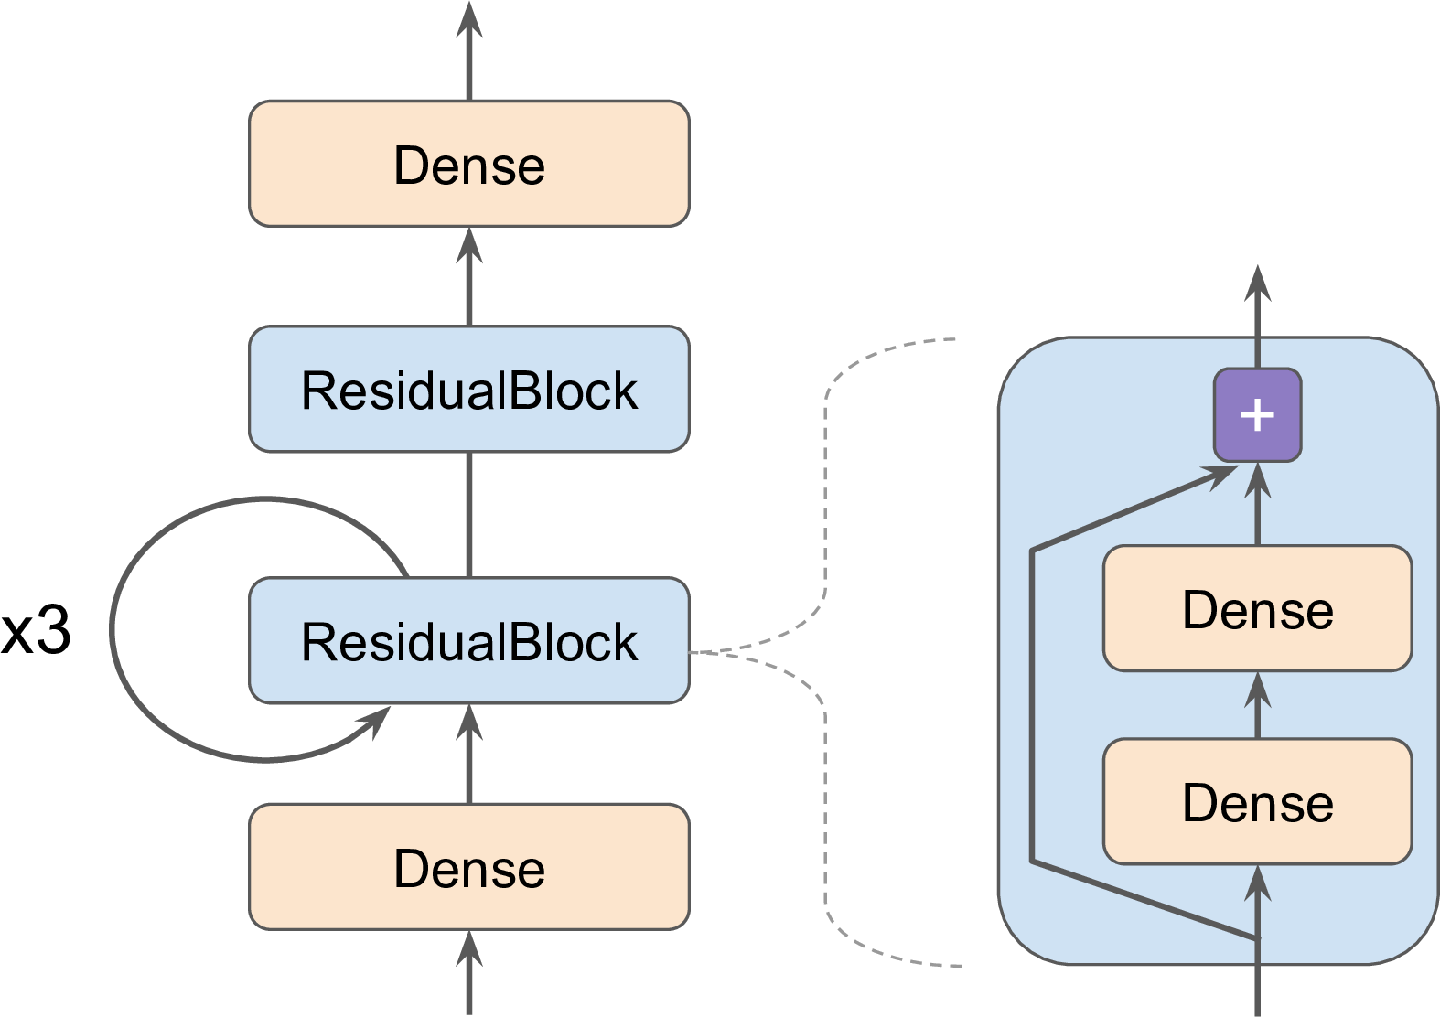

Suppose you want to build the model represented in figure

To implement this model, it is best to first create a ResidualBlock layer, since we are going to create a couple of identical blocks (and we might want to reuse it in another model):

In [113]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation = 'elu', kernel_initializer='he_normal') 
                          for _ in range(n_layers)]
        
    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
            
        return inputs + Z
        

Next, let’s use the Subclassing API to define the model itself:

In [114]:
class ResidualRegressor(keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation = 'elu',
                                         kernel_initializer = 'he_normal')
        self.block1 = ResidualBlock(2,30)
        self.block2 = ResidualBlock(2,30)
        self.out = keras.layers.Dense(output_dim)
        
    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

If you also want to be able to save the model using the save() method and load it using the keras.models.load_model() function, you must implement the get_config() method (as we did earlier) in both the ResidualBlock class and the ResidualRegressor class.

In [118]:
keras.backend.clear_session()
np.random.seed(259)
tf.random.set_seed(259)

In [122]:
model = ResidualRegressor(1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience= 10, restore_best_weights=True)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=40, validation_data=(X_valid_scaled, y_valid),callbacks=[early_stopping_cb])
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_test_scaled)

Epoch 1/40
363/363 [==============================] - 2s 5ms/step - loss: 31.6637 - val_loss: 11.8559
Epoch 2/40
363/363 [==============================] - 2s 4ms/step - loss: 4.8879 - val_loss: 12.6859
Epoch 3/40
363/363 [==============================] - 2s 5ms/step - loss: 12.5674 - val_loss: 10.2993
Epoch 4/40
363/363 [==============================] - 2s 5ms/step - loss: 9.6330 - val_loss: 4.3503
Epoch 5/40
363/363 [==============================] - 2s 6ms/step - loss: 2.8625 - val_loss: 14.2352
Epoch 6/40
363/363 [==============================] - 2s 6ms/step - loss: 8.6314 - val_loss: 0.8570
Epoch 7/40
363/363 [==============================] - 2s 6ms/step - loss: 0.7252 - val_loss: 0.7471
Epoch 8/40
363/363 [==============================] - 2s 5ms/step - loss: 0.6578 - val_loss: 0.7654
Epoch 9/40
363/363 [==============================] - 2s 5ms/step - loss: 0.6616 - val_loss: 0.5979
Epoch 10/40
363/363 [==============================] - 2s 5ms/step - loss: 0.5243 - val_loss: 